# TP 1 - Visión por Computadora 1 | Parte 2

## Enunciado:

### Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘ features ’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

*** 

### Funciones y variables globales

In [1]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def get_image(path, rgb=False, hsv=False):
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    color = True if rgb or hsv else False
    if color:
        img = cv.imread(path, cv.IMREAD_COLOR)
        
    if rgb:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    elif hsv:
        img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    return img

In [3]:
def plot_bw_image(image, title, bw=True):
    f = plt.figure()
    f.set_figwidth(14)
    f.set_figheight(6)
    
    if bw:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.title(title)
    plt.show()

## Parte 2

### 2.1. Lectura y visualización de las imágenes en escala de grises

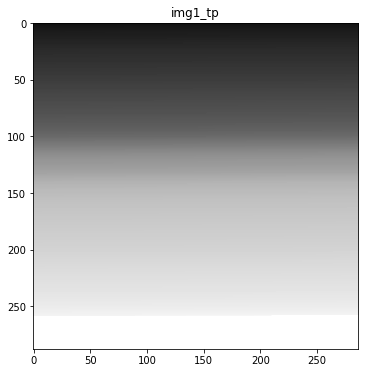

In [4]:
img1_tp = get_image('img1_tp.png')
plot_bw_image(img1_tp, 'img1_tp')

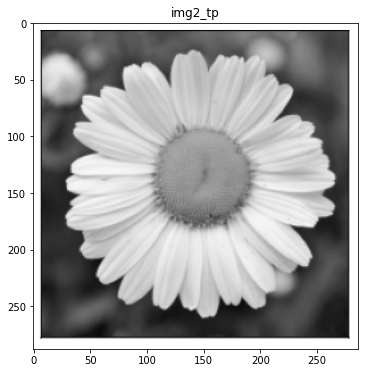

In [5]:
img2_tp = get_image('img2_tp.png')
plot_bw_image(img2_tp, 'img2_tp')

### 2.2. Histogramas

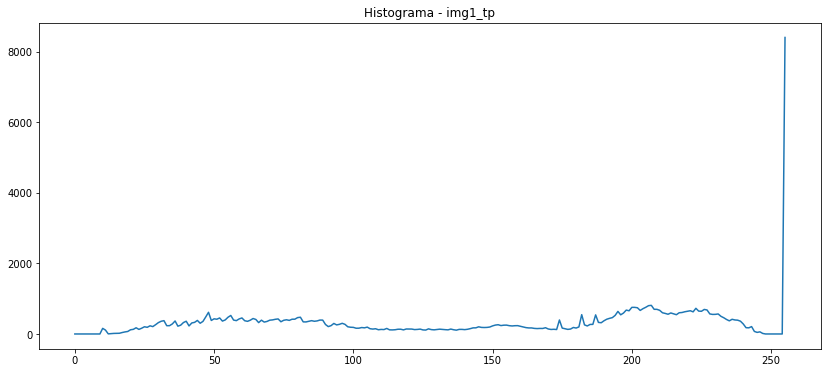

In [6]:
hist1, bins1 = np.histogram(img1_tp.ravel(), 256, [0,256])

f = plt.figure()
f.set_figwidth(14)
f.set_figheight(6)
plt.plot(hist1)
plt.title('Histograma - img1_tp')
plt.show()

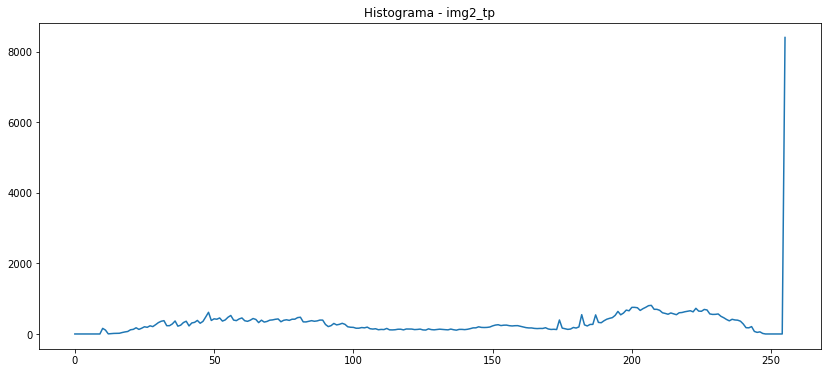

In [7]:
hist2, bins2 = np.histogram(img2_tp.ravel(), 256, [0,256])

f = plt.figure()
f.set_figwidth(14)
f.set_figheight(6)
plt.plot(hist2)
plt.title('Histograma - img2_tp')
plt.show()

### Conclusiones: histogramas

Elegí 256 bins ya que al tratarse de imágenes en escala de grises, ese es el número máximos de valores de intensidad que puede tomar cada pixel, además al trabajar con imágenes de 288 x 287 píxeles, contamos con 82.656 muestras, por lo que es factible seleccionar este número de bins, favoreciendo además la interpretabilidad.

Es posible observar que el histograma de ambas imágenes presenta una distribución igual, por lo que si tuviera que entrenar un modelo de clasificación/detección de imágenes, **no sería de utilidad tomar como 'features' a los histogramas**. Esto es debido a que para imágenes diferentes proveen el mismo histograma, perdiendo capacidad de representatividad.

### 2.3. Segmentación

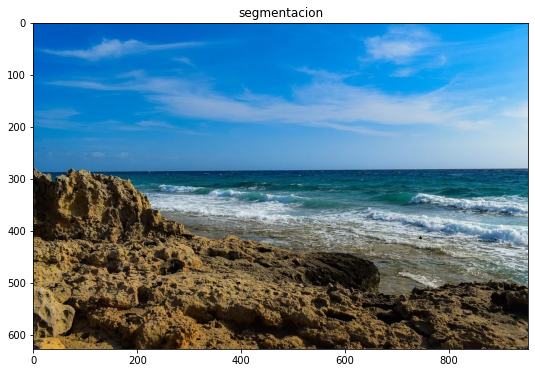

In [8]:
segmentacion = get_image('segmentacion.png', rgb=True)
plot_bw_image(segmentacion, 'segmentacion', bw=False)

#### Histograma RGB de la imagen

In [9]:
im_r, im_g, im_b = cv.split(segmentacion)

In [10]:
hist_r, bins_r = np.histogram(im_r.ravel(), 256, [0,256])
hist_g, bins_g = np.histogram(im_g.ravel(), 256, [0,256])
hist_b, bins_b = np.histogram(im_b.ravel(), 256, [0,256])

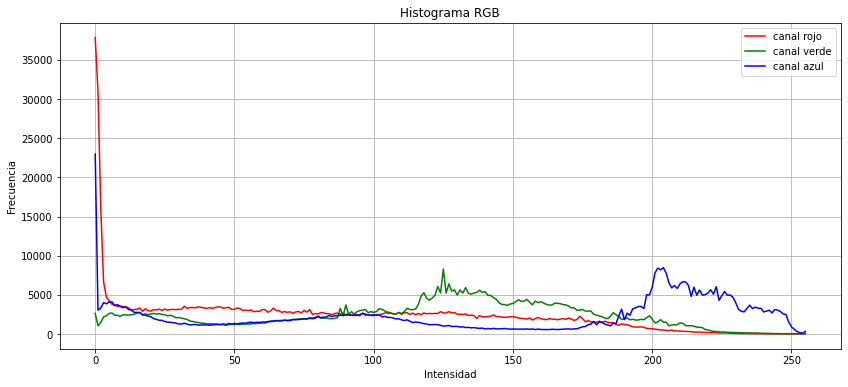

In [11]:
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(6)

plt.plot(hist_r, color='r', label='canal rojo')
plt.plot(hist_g, color='g', label='canal verde')
plt.plot(hist_b, color='b', label='canal azul')

plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.title('Histograma RGB')

plt.grid()
plt.legend()
plt.show()

#### Proyección 3D de la imagen en el espacio de color RGB

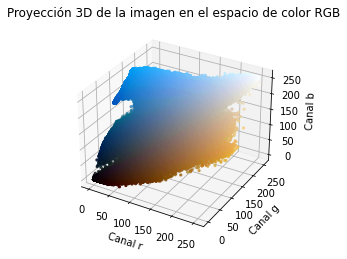

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

fig = plt.figure()
f.set_figwidth(18)
f.set_figheight(18)
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = segmentacion.reshape((np.shape(segmentacion)[0]*np.shape(segmentacion)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(im_r.flatten(), im_g.flatten(), im_b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_title("Proyección 3D de la imagen en el espacio de color RGB")
axis.set_xlabel("Canal r")
axis.set_ylabel("Canal g")
axis.set_zlabel("Canal b")
plt.show()

#### Representación de la imagen en el espacio HSV

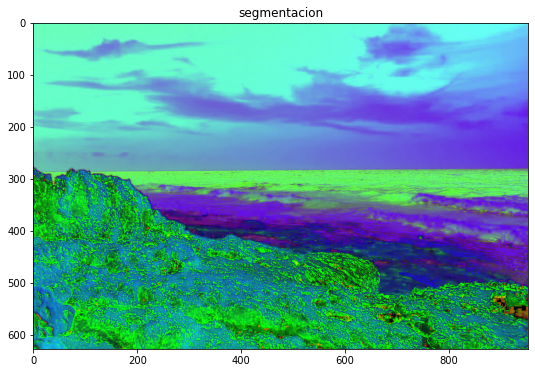

In [13]:
segmentacion_hsv = get_image('segmentacion.png', hsv=True)
plot_bw_image(segmentacion_hsv, 'segmentacion', bw=False)

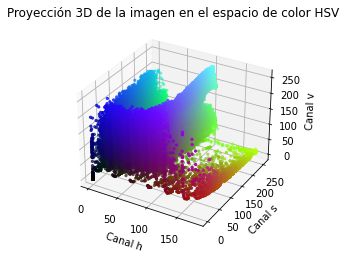

In [14]:
h, s, v = cv.split(segmentacion_hsv)
fig = plt.figure()
f.set_figwidth(18)
f.set_figheight(18)
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = segmentacion_hsv.reshape((np.shape(segmentacion_hsv)[0]*np.shape(segmentacion_hsv)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_title("Proyección 3D de la imagen en el espacio de color HSV")
axis.set_xlabel("Canal h")
axis.set_ylabel("Canal s")
axis.set_zlabel("Canal v")
plt.show()

### Segmentando cielo

In [15]:
# Muestra del cielo
print(segmentacion_hsv[0, 100, :])

[106 255 188]


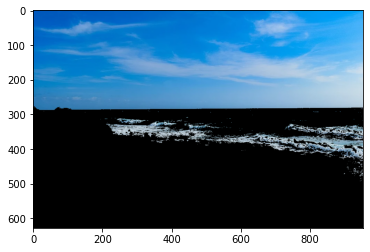

In [16]:
color_l = (95, 25, 160)
color_u = (120, 255, 255)

mask = cv.inRange(segmentacion_hsv, color_l,  color_u)
img_segmentada = cv.bitwise_and(segmentacion, segmentacion, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()

### Segmentando agua

In [17]:
# Muestra del agua
print(segmentacion_hsv[320, 700, :])

[ 96 190 102]


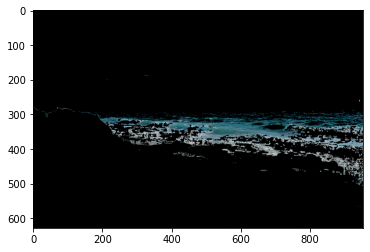

In [18]:
color_l = (85, 0, 0)
color_u = (100, 225, 225)

mask = cv.inRange(segmentacion_hsv, color_l,  color_u)
img_segmentada = cv.bitwise_and(segmentacion, segmentacion, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()

### Segmentando tierra

In [19]:
# Muestra de tierra
print(segmentacion_hsv[500, 500, :])

[ 19 171  79]


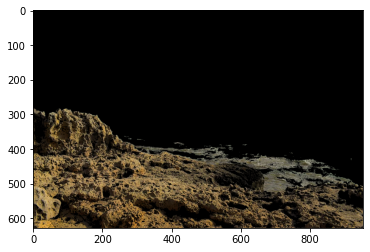

In [20]:
color_l = (0, 25, 25)
color_u = (50, 230, 230)

mask = cv.inRange(segmentacion_hsv, color_l,  color_u)
img_segmentada = cv.bitwise_and(segmentacion, segmentacion, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()